<a href="https://colab.research.google.com/github/fmuranda/Remote-Sensing/blob/main/tutorials/W1D2_Ocean-AtmosphereReanalysis/W1D2_Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D2_Ocean-AtmosphereReanalysis/W1D2_Tutorial4.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D2_Ocean-AtmosphereReanalysis/W1D2_Tutorial4.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 4: Oceanic Wind-Driven Circulation

**Week 1, Day 2: Ocean and Atmospheric Reanalysis**

**Content creators:**   Abigail Bodner

**Content reviewers:** Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Brodie Pearson, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** NFDI4Earth, CMIP


# Tutorial Objectives

*Estimated timing of tutorial: 20 mins*

The ocean's motion is driven by radiation from the sun, winds, and various sources & sinks of fresh water  (precipitation, rivers, melting and freezing ice). In the previous tutorial, you quantified the surface winds around the world. The surface winds drag on the surface of the ocean which results in water mass transport, known as Ekman transport.

In this tutorial you will use the [ECCO (Estimating the Circulation and Climate of the Ocean)](https://www.ecco-group.org) reanalysis data, to visualize the ocean's surface currents and to compare these currents against local atmospheric conditions.

At the end of this tutorial, you will be able to

- Access and manipulate ocean reanalysis data
- Plot annual mean ocean surface currents and atmospheric surface winds
- Compare oceanic and atmospheric circulation patterns

# Setup

In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 55.1 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import os
import pooch
import tempfile
import xarray as xr
import warnings
from cartopy import crs as ccrs

#  suppress warnings issued by Cartopy when downloading data files
warnings.filterwarnings("ignore")

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D2_T4"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


In [4]:
# @title Helper functions

def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W1D2_Ocean-AtmosphereReanalysis"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [5]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [6]:
# @title Video 1: Ocean Wind-driven Circulation

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'k-rMUYEskHY'), ('Bilibili', 'BV1tW4y1o7DH')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [7]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Ocean_Wind_Driven_Circulation_Video")

In [8]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "f8c5r"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/f8c5r/


In [9]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Ocean_Wind_Driven_Circulation_Slides")

# Section 1: Load Ocean & Atmosphere Reanalysis Data

Here you will load atmospheric near-surface winds (at 10-meter height), and then load the oceanic surface currents from [ECCO reanalysis data](https://www.ecco-group.org/products-ECCO-V4r4.htm).

*Note, that each of these variables is a velocity with two components (zonal and meridional). These two velocity components must be loaded separately for each variable, so you will load four datasets.*



In [10]:
# load data: atmospheric 10m wind from ECCO
# wind in east/west direction labeled here as 'u'
fname_atm_wind_u = "wind_evel_monthly_2016.nc"
url_atm_wind_u = "https://osf.io/ke9yp/download"
atm_wind_u = xr.open_dataarray(pooch_load(url_atm_wind_u, fname_atm_wind_u))
atm_wind_u

SHA256 hash of downloaded file: 728abbbcf931d178e95f1fdf6df61da45d8ec21627a9b3cc30d65be55b0e8d6d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'EXFewind' (time: 12, latitude: 360, longitude: 720)> Size: 25MB
[3110400 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 96B 2016-01-16T12:00:00 ... 2016-12-16T1...
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
Attributes:
    units:      m/s
    long_name:  eastward 10-m wind velocity over open water, >0 increases eVel
    mate:       EXFnwind

In [11]:
# wind in north/south direction labeled here as 'v'
fname_atm_wind_v = "wind_nvel_monthly_2016.nc"
url_atm_wind_v = "https://osf.io/9zkgd/download"
atm_wind_v = xr.open_dataarray(pooch_load(url_atm_wind_v, fname_atm_wind_v))
atm_wind_v

SHA256 hash of downloaded file: 0d5b2a21c84483395a48bfa2a55e022d4c4cb08a07e29e64a750b0b08f64413a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'EXFnwind' (time: 12, latitude: 360, longitude: 720)> Size: 25MB
[3110400 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 96B 2016-01-16T12:00:00 ... 2016-12-16T1...
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
Attributes:
    units:      m/s
    long_name:  northward 10-m wind velocity over open water, >0 increases nVel
    mate:       EXFewind

In [12]:
# load data: oceanic surface current from ECCO
# current in east/west direction labeled here as 'u'
fname_ocn_surface_current_u = "evel_monthly_2016.nc"
url_ocn_surface_current_u = "https://osf.io/tyfbv/download"
ocn_surface_current_u = xr.open_dataarray(
    pooch_load(url_ocn_surface_current_u, fname_ocn_surface_current_u)
)
ocn_surface_current_u

SHA256 hash of downloaded file: b7b43f76c9a198d3f5070ac4a25e395f004f41d30c8c71ba408298ebf2965720
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'EVEL' (time: 12, latitude: 360, longitude: 720)> Size: 25MB
[3110400 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 96B 2016-01-16T12:00:00 ... 2016-12-16T1...
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
Attributes:
    units:          m/s
    long_name:      Eastward Component of Velocity (m/s)
    standard_name:  eastward_sea_water_velocity

In [13]:
# current in east/west direction labeled here as 'v'
fname_ocn_surface_current_v = "nvel_monthly_2016.nc"
url_ocn_surface_current_v = "https://osf.io/vzdn4/download"
ocn_surface_current_v = xr.open_dataarray(
    pooch_load(url_ocn_surface_current_v, fname_ocn_surface_current_v)
)
ocn_surface_current_v

SHA256 hash of downloaded file: 5ff7da554a37f310fb429886e4c29d76148cf96316aa92acce202e952db7bebc
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'NVEL' (time: 12, latitude: 360, longitude: 720)> Size: 25MB
[3110400 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 96B 2016-01-16T12:00:00 ... 2016-12-16T1...
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
Attributes:
    units:          m/s
    long_name:      Northward Component of Velocity (m/s)
    standard_name:  northward_sea_water_velocity

## Section 1.1: Exploring the Reanalysis Data

Let's examine the time (or temporal/output) frequency, which descibes the rate at which the reanalysis data is provided, for one of the ECCO variables (```atm_wind_u```).

*Note that all the variables should have the same output frequency.*

In [14]:
atm_wind_u.time

<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2016-01-16T12:00:00.000000000', '2016-02-15T12:00:00.000000000',
       '2016-03-16T12:00:00.000000000', '2016-04-16T00:00:00.000000000',
       '2016-05-16T12:00:00.000000000', '2016-06-16T00:00:00.000000000',
       '2016-07-16T12:00:00.000000000', '2016-08-16T12:00:00.000000000',
       '2016-09-16T00:00:00.000000000', '2016-10-16T12:00:00.000000000',
       '2016-11-16T00:00:00.000000000', '2016-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 96B 2016-01-16T12:00:00 ... 2016-12-16T12:...
Attributes:
    long_name:  center time of averaging period
    bounds:     time_bnds
    axis:       T

### Questions 1.1
1. Why do you think the atmospheric reanalysis dataset from the previous tutorial (ERA5) has higher output frequency (hourly) than the ECCO ocean reanalysis dataset (daily)?
2. What can you infer about the role of these two systems at different timescales in the climate system?

In [15]:
# to_remove explanation

"""
1. The atmospheric dataset has a higher output frequency than the oceanic dataset because of the different timescales on which the atmosphere and the ocean change significantly. The atmosphere has a lower heat capacity (i.e., thermal inertia) and density than the ocean. This means that the temperature and wind speed (which is related to momentum) of the atmosphere can change rapidly (over minutes to hours), while the ocean temperature and currents change more slowly.
2. The atmosphere plays a faster, more immediate role in the climate system than the ocean. It reacts quickly to heat and pressure differences, driving weather and synoptic features. The ocean, on the other hand, plays a longer-term role in the climate system and provides a buffering effect against rapid atmospheric changes.
"""

'\n1. The atmospheric dataset has a higher output frequency than the oceanic dataset because of the different timescales on which the atmosphere and the ocean change significantly. The atmosphere has a lower heat capacity (i.e., thermal inertia) and density than the ocean. This means that the temperature and wind speed (which is related to momentum) of the atmosphere can change rapidly (over minutes to hours), while the ocean temperature and currents change more slowly.\n2. The atmosphere plays a faster, more immediate role in the climate system than the ocean. It reacts quickly to heat and pressure differences, driving weather and synoptic features. The ocean, on the other hand, plays a longer-term role in the climate system and provides a buffering effect against rapid atmospheric changes.\n'

In [16]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_1")

# Section 2: Plotting the Annual Mean of Global Surface Wind Stress

In this section you will create global maps displaying the annual mean of atmospheric 10m winds.

First, you should compute the annual mean of the surface wind variables. You can do so by averaging over the time dimension using `.mean(dim='time')`. Since you have monthly data spanning only one year, `.mean(dim='time')` will give the annual mean for the year 2016.


In [17]:
# compute the annual mean of atm_wind_u
atm_wind_u_an_mean = atm_wind_u.mean(dim="time")
atm_wind_u_an_mean

<xarray.DataArray 'EXFewind' (latitude: 360, longitude: 720)> Size: 2MB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.14805873, 1.14805873, 1.14805873, ..., 1.14805873, 1.14805873,
        1.14805873],
       [1.03043525, 1.03043525, 1.03043525, ..., 1.03043525, 1.03043525,
        1.03043525],
       [0.60513089, 0.60513089, 0.60513089, ..., 0.60513089, 0.60513089,
        0.60513089]])
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8

In [18]:
# take the annual mean of atm_wind_stress_v
atm_wind_v_an_mean = atm_wind_v.mean(dim="time")
atm_wind_v_an_mean

<xarray.DataArray 'EXFnwind' (latitude: 360, longitude: 720)> Size: 2MB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29360731, 0.29360731, 0.29360731, ..., 0.29360731, 0.29360731,
        0.29360731],
       [0.25386951, 0.25386951, 0.25386951, ..., 0.25386951, 0.25386951,
        0.25386951],
       [0.64899328, 0.64899328, 0.64899328, ..., 0.64899328, 0.64899328,
        0.64899328]])
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8

You are now almost ready to plot!

However, you currently have separate zonal and meridional wind velocity components $(u,v)$. An effective way of visualizing the total surface wind stress is to create a global map of the *magnitude* and *direction* of the wind velocity vector. This type of plot is known as a vector field. A [vector](https://glossary.ametsoc.org/wiki/Vector) is a special mathematical quantity that has both magnitude and direction, just like the wind! The velocity components describe the intensity of wind blowing in the zonal $\left(u\right)$ or meridional $\left(v\right)$ directions. Specifically, wind can blow eastward (positive $u$) or westward (negative $u$), as well as northward (positive $v$) or southward (negative $v$).

The total velocity vector is the *vector sum* of these two components and exhibits varying magnitude and direction. The magnitude $\left(||u||\right)$ and direction $\left(\varphi\right)$ of the total velocity vector can be determined using the following equations:

\begin{align}
||u|| = \sqrt{u^2 + v^2},  \ \  \ \ \varphi = \text{tan}^{-1}(\frac{v}{u})
\end{align}

When plotting a vector field using a computer, it is commonly referred to as a quiver plot. In our case, we will utilize a [function created by Ryan Abernathey's](https://rabernat.github.io/intro_to_physical_oceanography/07_ekman.html) called `quick_quiver()` that calculates the magnitude and direction of the total velocity vector based on the given zonal and meridional components.

We will overlay the quiver plot on top of the annual mean ocean surface temperature (labeled here as theta).

In [19]:
fname_surface_temp = "surface_theta.nc"
url_fname_surface_temp = "https://osf.io/98ksr/download"
ocn_surface_temp = xr.open_dataarray(
    pooch.retrieve(url_fname_surface_temp, known_hash=None, fname=fname_surface_temp)
)
ocn_surface_temp

SHA256 hash of downloaded file: 2d8db6d497acec50c4d0753ba69c610231dc02294ab1dc99640e0fce0285d369
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'THETA' (latitude: 360, longitude: 720)> Size: 2MB
[259200 values with dtype=float64]
Coordinates:
    i          (longitude) int64 6kB ...
    k          int64 8B ...
    j          (latitude) int64 3kB ...
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
    Z          float32 4B ...

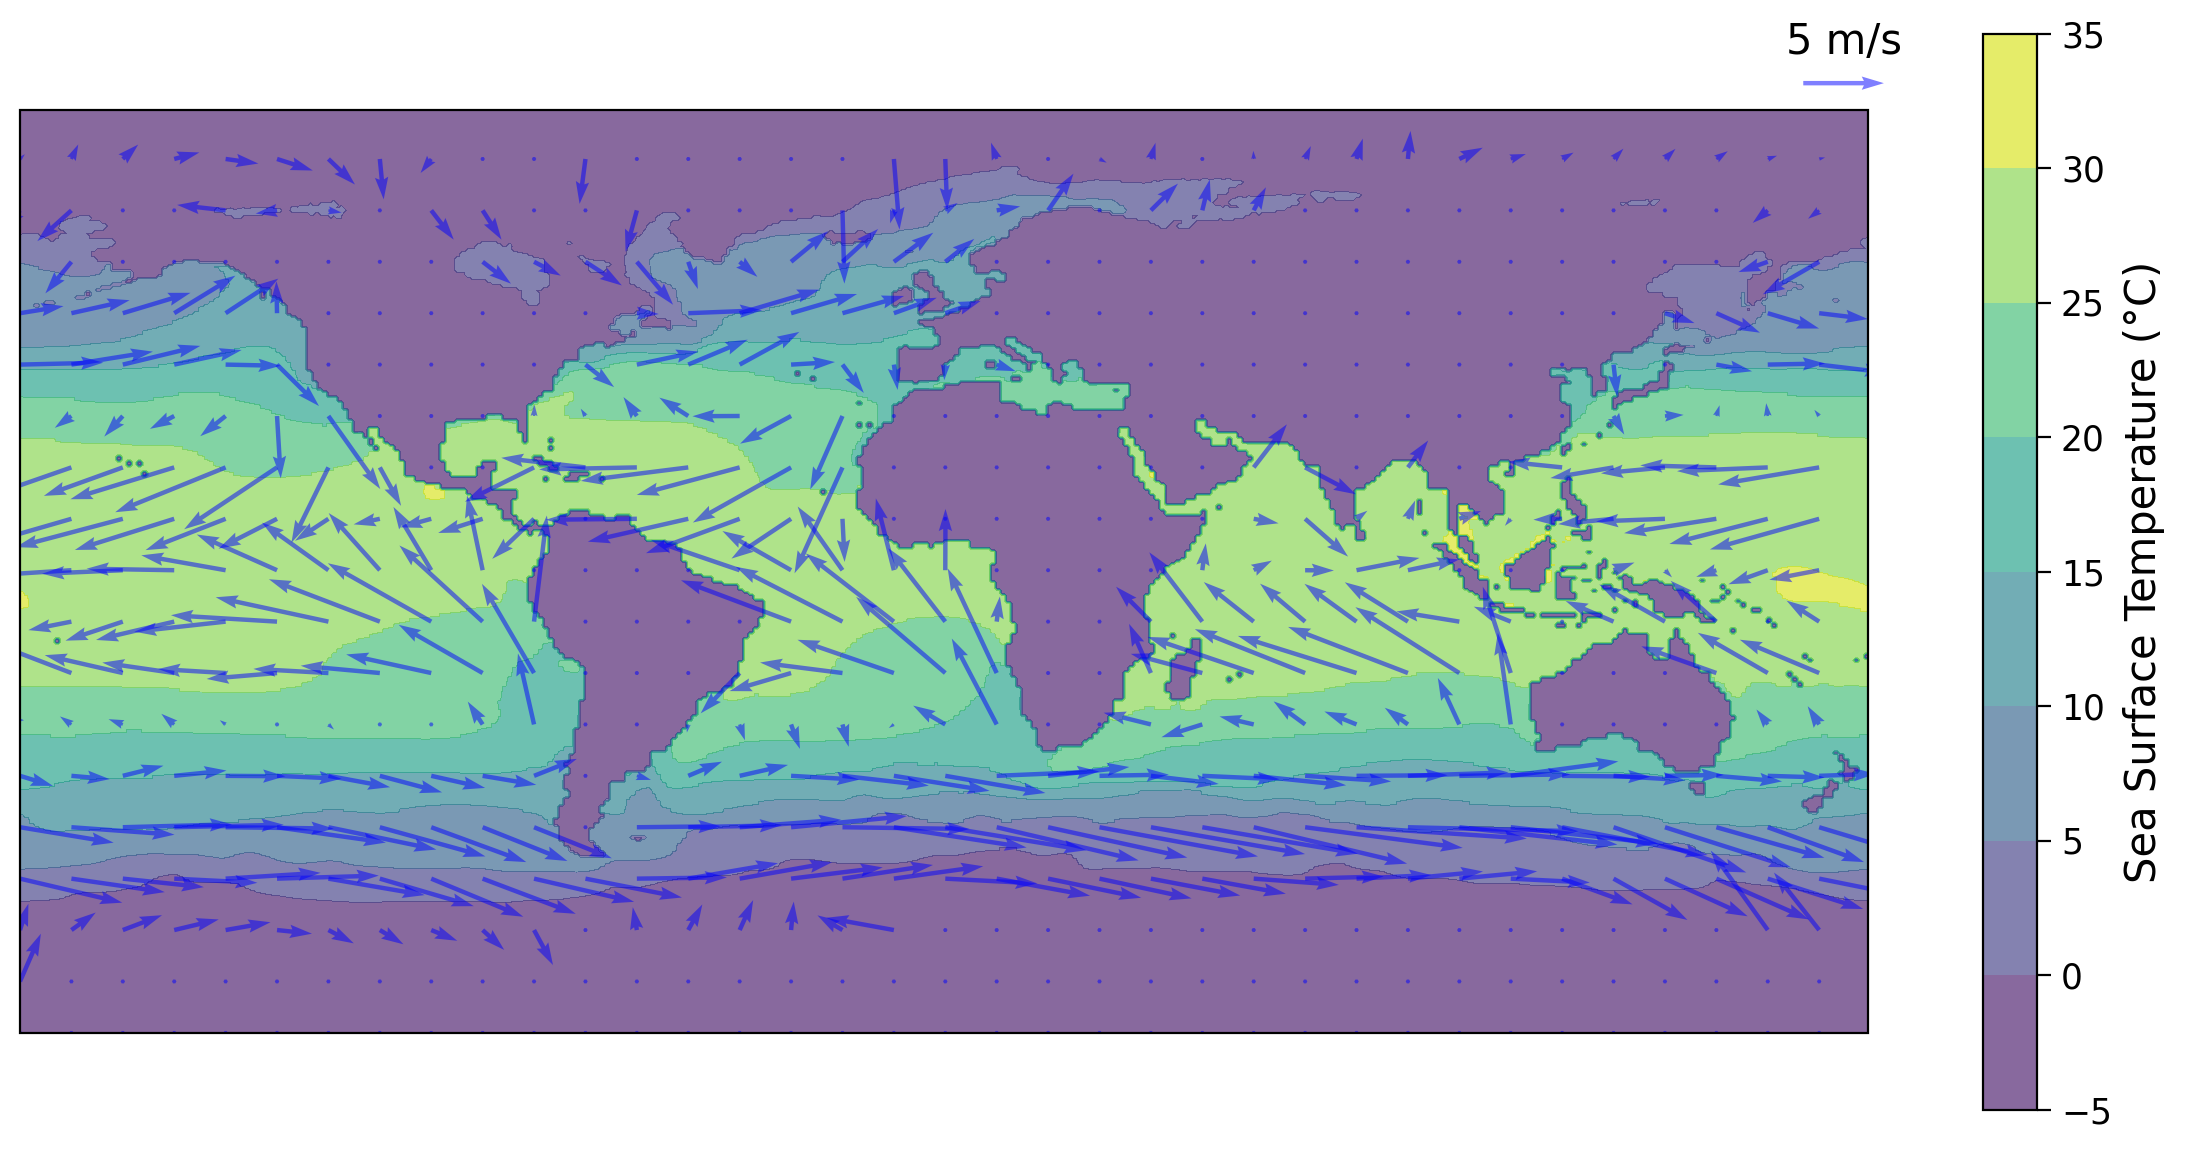

In [20]:
# longitude ad latitude coordinates for plotting
lon = atm_wind_u_an_mean.longitude
lat = atm_wind_u_an_mean.latitude

# calculate magnitude of total velocity
mag = (atm_wind_u_an_mean**2 + atm_wind_v_an_mean**2) ** 0.5

# coarsen the grid so the arrows are distinguishable by only selecting
# some longitudes and latitudes defined by the last entry of the tuples.
slx = slice(None, None, 20)
sly = slice(None, None, 20)
sl2d = (slx, sly)

fig, ax = plt.subplots(
    figsize=(12, 6), subplot_kw={"projection": ccrs.Robinson(central_longitude=180)}
)

c = ax.contourf(lon, lat, ocn_surface_temp, alpha=0.65)

# plot quiver arrows indicating vector direction (winds are in blue, alpha is for opacity)
q = ax.quiver(
    lon[slx],
    lat[sly],
    atm_wind_u_an_mean[sl2d],
    atm_wind_v_an_mean[sl2d],
    color="b",
    alpha=0.5,
)

ax.quiverkey(q, 175, 95, 5, "5 m/s", coordinates="data")

fig.colorbar(c, label="Sea Surface Temperature (°C)")

# Section 3: Comparing Global Maps of Surface Currents and Winds

In this section you will compute the annual mean of the ocean surface currents, similar to your above analyses of atmospheric winds, and you will create a global map that shows both of these variables simultaneously.

In [21]:
# take the annual mean of ocn_surface_current_u
ocn_surface_current_u_an_mean = ocn_surface_current_u.mean(dim="time")
ocn_surface_current_u_an_mean

<xarray.DataArray 'EVEL' (latitude: 360, longitude: 720)> Size: 2MB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01412442, 0.01412442, 0.01412442, ..., 0.01412442, 0.01412442,
        0.01412442],
       [0.01166078, 0.01166078, 0.01166078, ..., 0.01166078, 0.01166078,
        0.01166078],
       [0.0045507 , 0.0045507 , 0.0045507 , ..., 0.0045507 , 0.0045507 ,
        0.0045507 ]])
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8

In [22]:
# take the annual mean of ocn_surface_current_v
ocn_surface_current_v_an_mean = ocn_surface_current_v.mean(dim="time")
ocn_surface_current_v_an_mean

<xarray.DataArray 'NVEL' (latitude: 360, longitude: 720)> Size: 2MB
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0080977 , 0.0080977 , 0.0080977 , ..., 0.0080977 , 0.0080977 ,
        0.0080977 ],
       [0.00718934, 0.00718934, 0.00718934, ..., 0.00718934, 0.00718934,
        0.00718934],
       [0.01100426, 0.01100426, 0.01100426, ..., 0.01100426, 0.01100426,
        0.01100426]])
Coordinates:
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8

Let's add ocean surface currents to the previous plot above, using **red** quivers. Note the scale of the arrows for the ocean and atmosphere are very different.

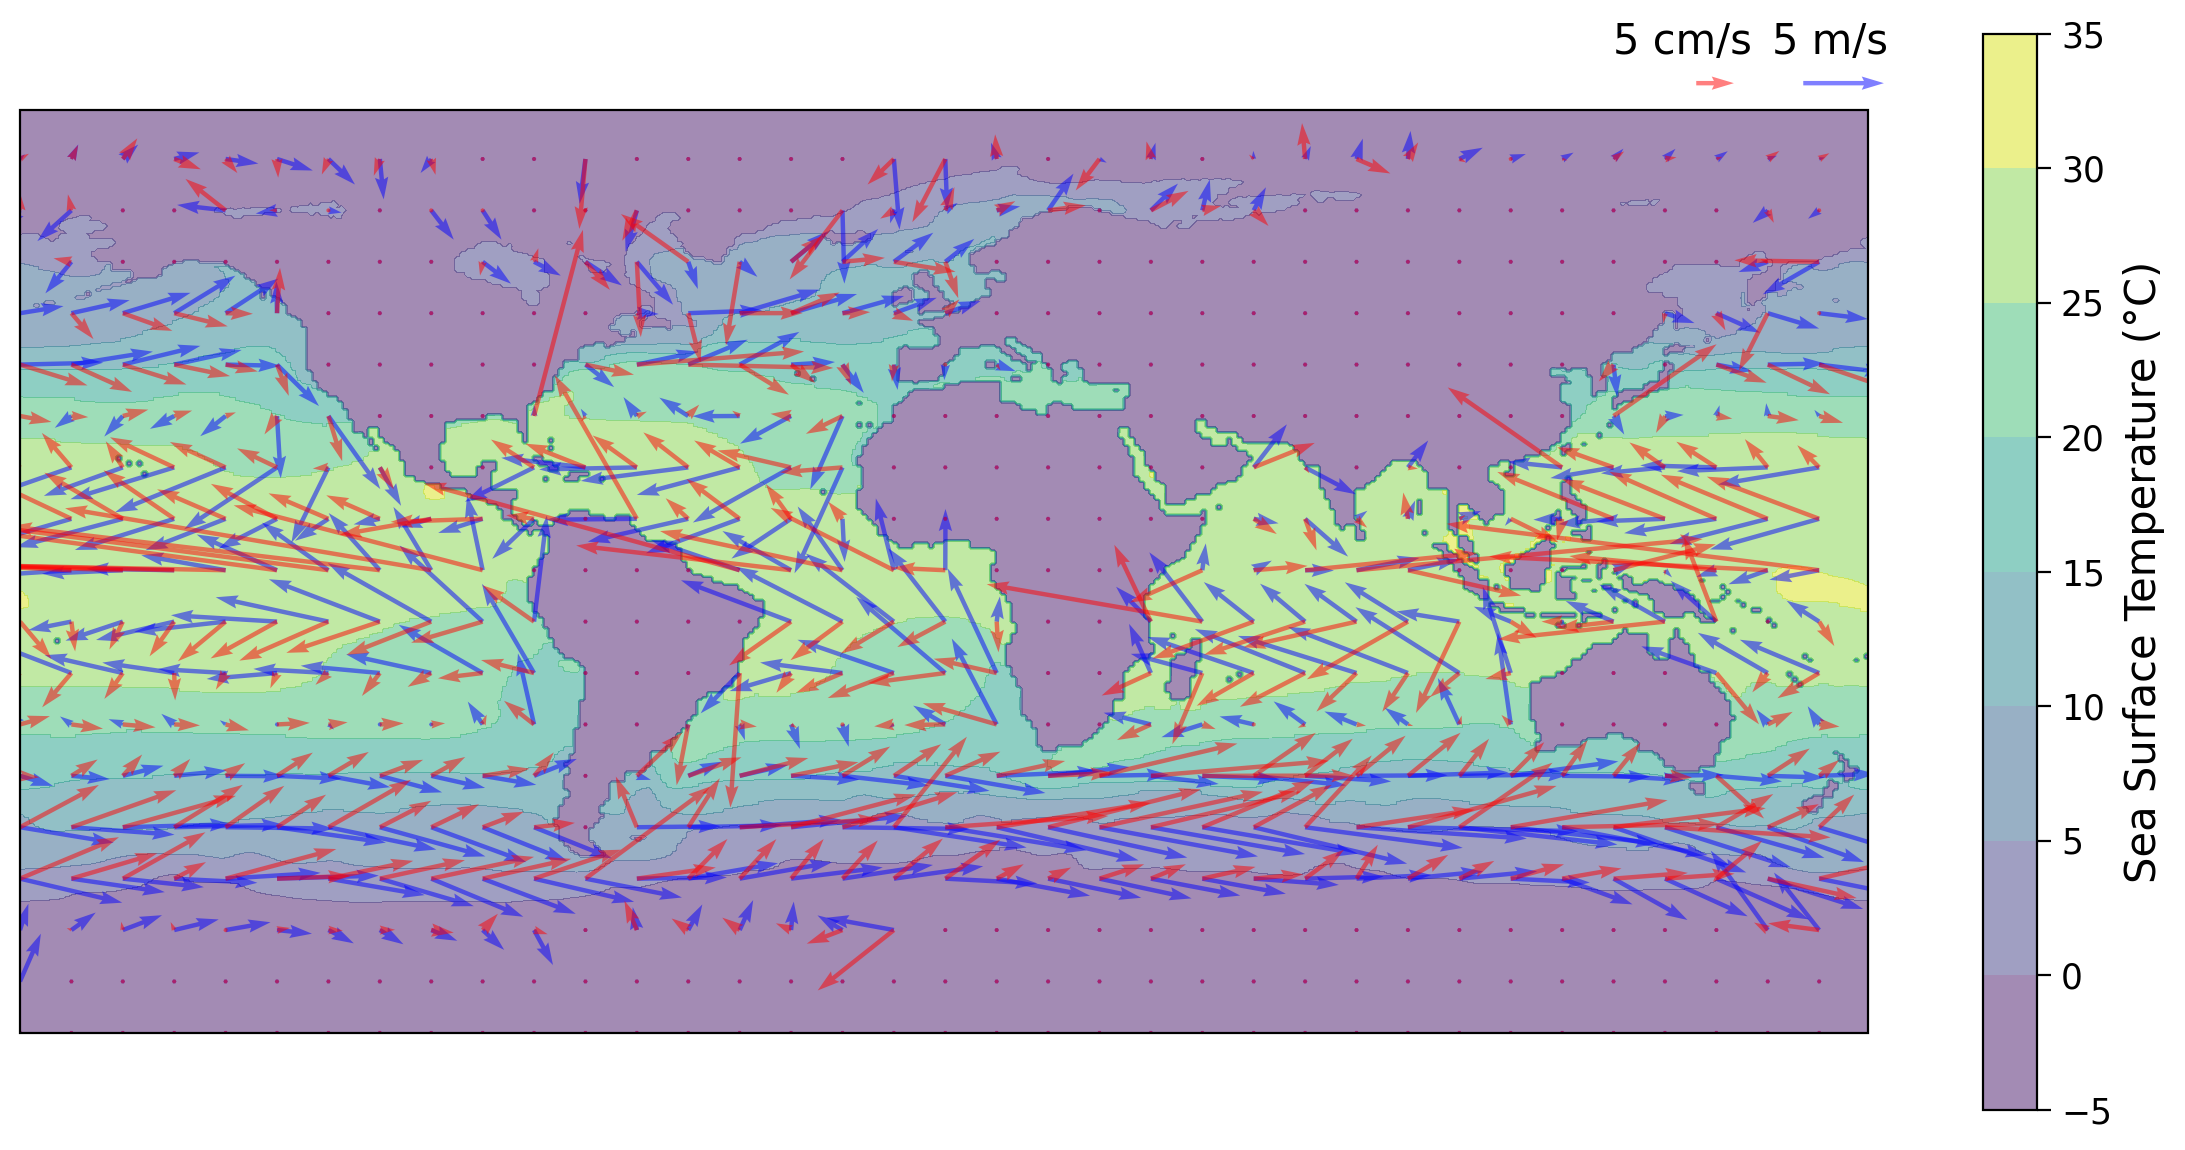

In [23]:
# longitude ad latitude coordinates for plotting
lon = atm_wind_u_an_mean.longitude
lat = atm_wind_u_an_mean.latitude

# calculate magnitude of total velocity
mag = (atm_wind_u_an_mean**2 + atm_wind_v_an_mean**2) ** 0.5

# coarsen the grid so the arrows are distinguishable by only selecting
# some longitudes and latitudes defined by slx and sly.
slx = slice(None, None, 20)
sly = slice(None, None, 20)
sl2d = (slx, sly)

# fig, ax = plt.subplots(**kwargs)
fig, ax = plt.subplots(
    figsize=(12, 6), subplot_kw={"projection": ccrs.Robinson(central_longitude=180)}
)

c = ax.contourf(lon, lat, ocn_surface_temp, alpha=0.5)

# plot quiver arrows indicating vector direction (winds are in blue, alpha is for opacity)
q1 = ax.quiver(
    lon[slx],
    lat[sly],
    atm_wind_u_an_mean[sl2d],
    atm_wind_v_an_mean[sl2d],
    color="b",
    alpha=0.5,
)

# plot quiver arrows indicating vector direction (ocean currents are in red, alpha is for opacity)
q2 = ax.quiver(
    lon[slx],
    lat[sly],
    ocn_surface_current_u_an_mean[sl2d],
    ocn_surface_current_v_an_mean[sl2d],
    color="r",
    alpha=0.5,
)

ax.quiverkey(q1, 175, 95, 5, "5 m/s  ", coordinates="data")

ax.quiverkey(q2, 150, 95, 0.05, "5 cm/s     ", coordinates="data")

fig.colorbar(c, label="Sea Surface Temperature (°C)")

## Questions 3

You may notice that the surface currents (red) are typically not aligned with the wind direction (blue). In fact, the surface ocean currents flow at an angle of approximately 45 degrees to the wind direction!

The combination of [Coriolis force](https://en.wikipedia.org/wiki/Coriolis_force) and the friction between ocean layers causes the wind-driven currents to turn and weaken with depth, eventually disappearing entirely at depth. The resulting current *profile* is called the **[Ekman Spiral](https://en.wikipedia.org/wiki/Ekman_spiral)**, and the depth over which the spiral is present is called the **Ekman layer**. While the shape of this spiral can vary in time and space, the depth-integrated transport of water within the Ekman layer is called [**Ekman transport**](https://en.wikipedia.org/wiki/Ekman_transport). Ekman transport is always *90 degrees to the right* of the wind in the Northern Hemisphere, and 90 degrees to the *left* of the wind in the Southern Hemisphere. Under certain wind patterns or near coastlines, Ekman transport can lead to **Ekman Pumping**, where water is upwelled or downwelled depending on the wind direction. This process is particularly important for coastal ecosystems that rely on this upwelling (which is often seasonal) to bring nutrient-rich waters near the surface. These nutrients fuel the growth of tiny marine plants that support the entire food chain, upon which coastal economies often rely. These tiny plants are also responsible for most of the oxygen we breathe!

1. Do you observe a deflection of the surface currents relative to the wind?
2. Is this deflection the same in both the Northern and Southern Hemispheres?


In [24]:
# to_remove explanation

"""
1. Yes, the surface currents are deflected relative to the surface winds, and this seems to happen globally.
2. The deflection of the ocean surface current is to the left of the wind in the Southern Hemisphere, and is to the right of the wind in the Northern Hemisphere. This property is predicted by Ekman flow.
"""

'\n1. Yes, the surface currents are deflected relative to the surface winds, and this seems to happen globally.\n2. The deflection of the ocean surface current is to the left of the wind in the Southern Hemisphere, and is to the right of the wind in the Northern Hemisphere. This property is predicted by Ekman flow.\n'

In [25]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_3")

# Summary


In this tutorial, you explored how atmospheric winds can shape ocean surface currents.

You calculated the surface wind vector and assessed its influence on surface ocean currents called the wind-driven circulation.

This circulation influences global climate (e.g., moving heat between latitudes) and biogeochemical cycles (e.g., by driving upwelling of nutrient-rich water). In the next tutorial, you will explore another mechanism for ocean movement, *density-driven circulation*.


# Resources

Data for this tutorial can be accessed [here](https://www.ecco-group.org/products-ECCO-V4r4.htm).